In [1]:
using LinearAlgebra
using Distributions
using LaTeXStrings
using Printf
using FileIO
import JLD2

In [2]:
using DataFrames


In [3]:
using Revise
using Newtrinos
using Newtrinos.osc

In [4]:
using Pkg
Pkg.status() 

Status `~/.julia/environments/myenv/Project.toml`
⌃ [13f3f980] CairoMakie v0.13.6
⌃ [7073ff75] IJulia v1.27.0
  [5b289081] Newtrinos v1.0.0-DEV `~/Newtrinos.jl`
⌃ [295af30f] Revise v3.7.5
⌃ [3cd96dde] UnROOT v0.8.20
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [5]:
osc_cfg = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.NND(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )


OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}(NND(ThreeFlavour(:NO)), SI(), Basic(), Newtrinos.osc.All())

In [6]:
osc = Newtrinos.osc.configure(osc_cfg)

Newtrinos.osc.Osc(OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}(NND(ThreeFlavour(:NO)), SI(), Basic(), Newtrinos.osc.All()), (θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761, δCP = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, m₀ = 0.01, N = 20.0, r = 1.0), (θ₁₂ = Uniform{Float64}(a=0.4205343352839651, b=0.7853981633974483), θ₁₃ = Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = Uniform{Float64}(a=0.5235987755982988, b=1.0471975511965976), δCP = Uniform{Float64}(a=0.0, b=6.283185307179586), Δm²₂₁ = Uniform{Float64}(a=6.5e-5, b=9.0e-5), Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), m₀ = Uniform{Float64}(a=0.001, b=1.0), N = Uniform{Float64}(a=1.0, b=90.0), r = Uniform{Float64}(a=1.0e-8, b=1.0)), Newtrinos.osc.var"#get_Nnaturalness#49"(), Newtrinos.osc.var"#osc_prob#39"{Newtrinos.osc.var"#osc_prob#37#40"{OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}}}(Newtrinos.osc.var"#osc_prob#37#40"{OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}}(OscillationC

In [7]:

atm_flux = Newtrinos.atm_flux.configure()
earth_layers = Newtrinos.earth_layers.configure()
xsec = Newtrinos.xsec.configure()

physics = (; osc, atm_flux, earth_layers, xsec);

In [8]:
experiments = (

 deepcore = Newtrinos.deepcore.configure(physics),
 
);

[ Info: Loading deepcore data


In [9]:
p = Newtrinos.get_params(experiments)

(N = 20.0, atm_flux_delta_spectral_index = 0.0, atm_flux_nuenumu_sigma = 0.0, atm_flux_nunubar_sigma = 0.0, atm_flux_uphorizonzal_sigma = 0.0, deepcore_atm_muon_scale = 1.0, deepcore_ice_absorption = 1.0, deepcore_ice_scattering = 1.0, deepcore_lifetime = 2.5, deepcore_opt_eff_headon = 0.0, deepcore_opt_eff_lateral = 0.0, deepcore_opt_eff_overall = 1.0, m₀ = 0.01, nc_norm = 1.0, nutau_cc_norm = 1.0, r = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

In [10]:
using CairoMakie

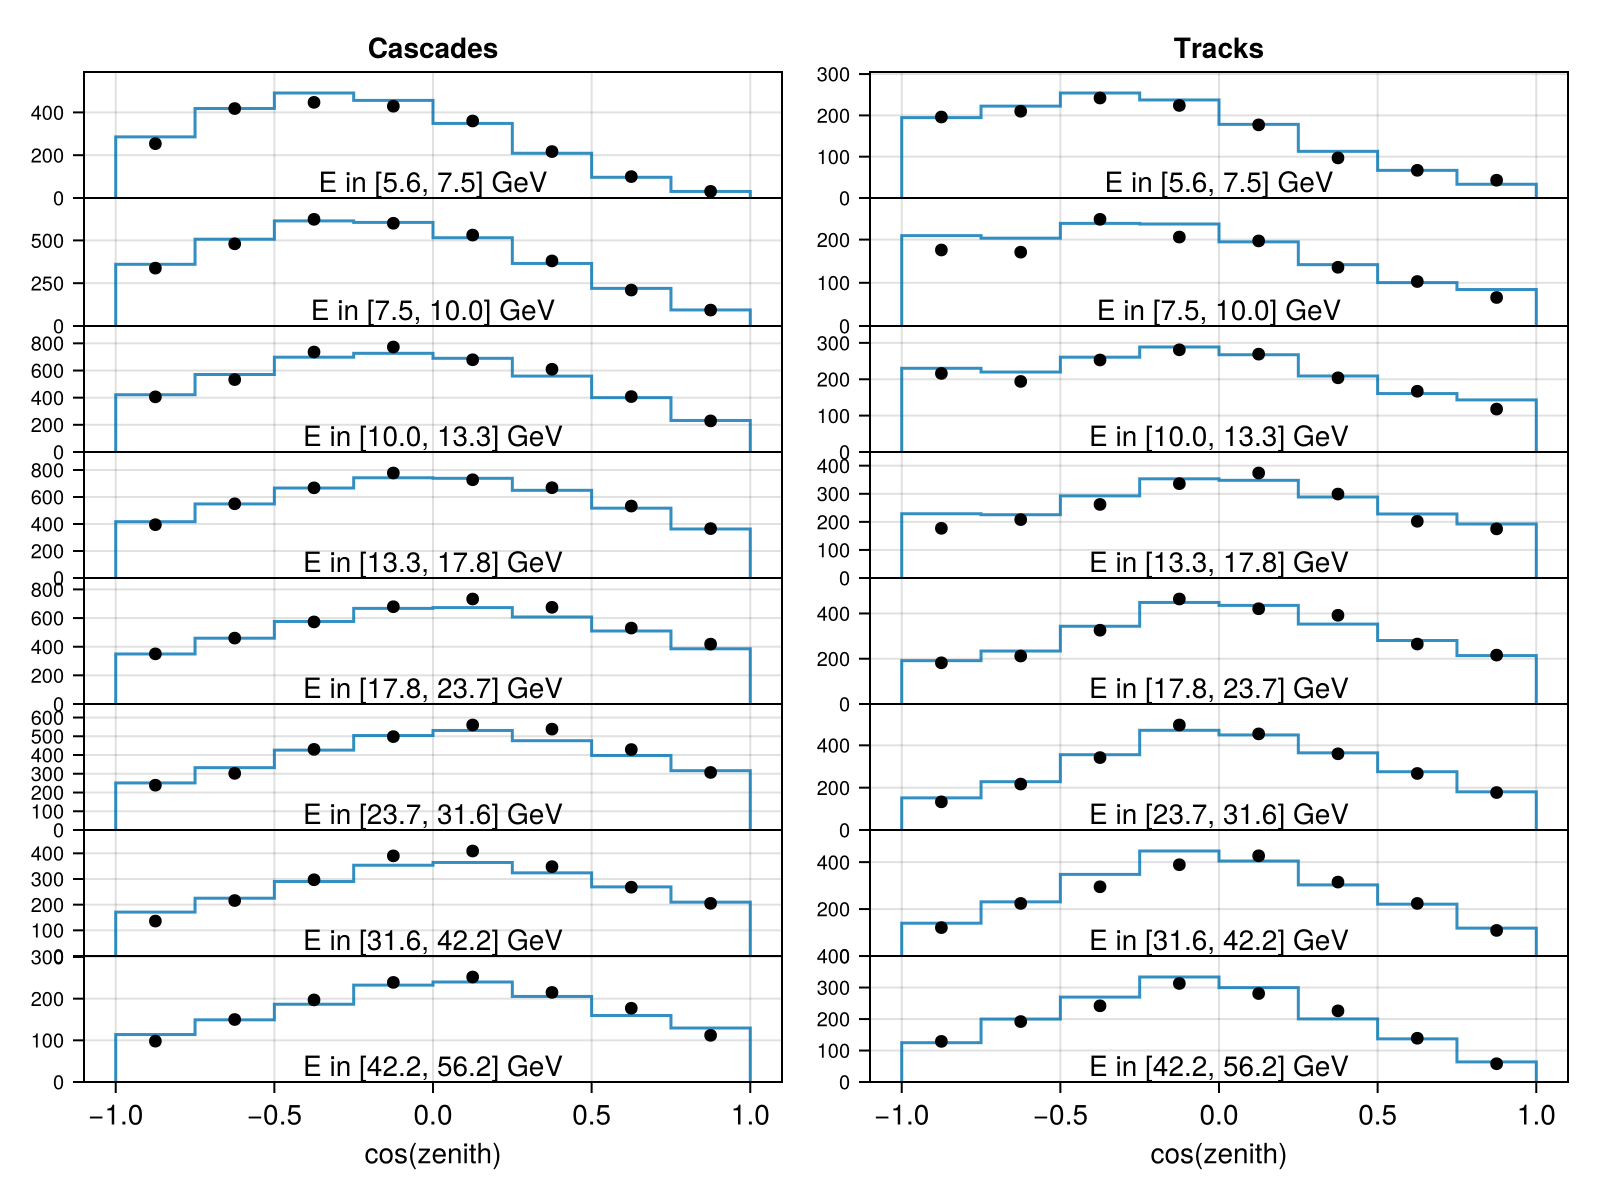

In [11]:
img = experiments.deepcore.plot(p)
display("image/png", img)
save("/home/sofialon/Newtrinos.jl/natural plot/deepcore/deepcore_data_NND.png", img)

In [13]:

all_priors = Newtrinos.get_priors(experiments)


vars_to_scan = (θ₂₃=31, Δm²₃₁=31)

modified_priors = (
   # N =all_priors.N, 
    #m₀= all_priors.m₀,
    #r = all_priors.r,
    


    Δm²₂₁ = p.Δm²₂₁,  
    Δm²₃₁ =all_priors.Δm²₃₁ , 
    δCP = p.δCP,    
    θ₁₂ = p.θ₁₂,    
    θ₁₃= p.θ₁₃,       
    θ₂₃ = all_priors.θ₂₃
)


(Δm²₂₁ = 7.53e-5, Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = Uniform{Float64}(a=0.5235987755982988, b=1.0471975511965976))

In [ ]:
likelihood = Newtrinos.generate_likelihood(experiments);


In [ ]:
result = Newtrinos.scan(likelihood, modified_priors, vars_to_scan, p)
#result = Newtrinos.scan(likelihood, Newtrinos.get_priors(experiments), (r=31, N=31), p)

In [ ]:
using CairoMakie

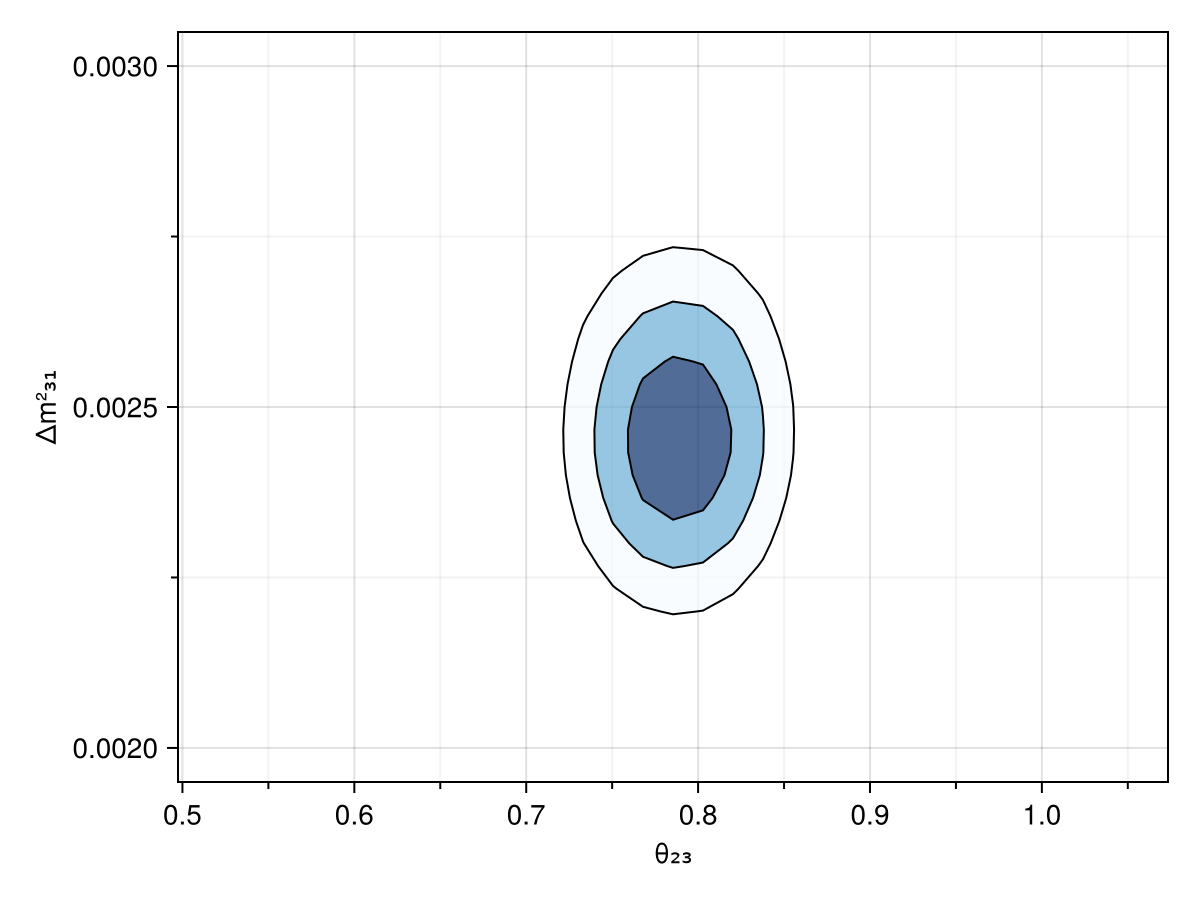

In [ ]:
img = CairoMakie.plot(result)
display("image/png", img)
save("/home/sofialon/Newtrinos.jl/natural plot/deepcore/deepcore_thetadelta_NND.png", img)


In [ ]:
L=experiments.deepcore.assets.paths
println("L = ", L)

L = Vector{Path}[Path[Path(20.100122271021974, 1), Path(673.7535819766746, 2), Path(2244.031468284953, 3), Path(2378.568580858474, 4), Path(2085.602784832241, 5), Path(2378.568580858474, 4), Path(2244.031468284953, 3), Path(671.7635819766746, 2)], Path[Path(20.30339868390365, 1), Path(681.3966588665074, 2), Path(2292.159706717164, 3), Path(2768.7443840562846, 4), Path(1066.3289477923754, 5), Path(2768.7443840562846, 4), Path(2292.159706717164, 3), Path(679.4266588665074, 2)], Path[Path(20.510820438365045, 1), Path(689.2268052997503, 2), Path(2343.31235446334, 3), Path(6358.472945802318, 4), Path(2343.31235446334, 3), Path(687.2768052997502, 2)], Path[Path(20.722515382969505, 1), Path(697.2513830864398, 2), Path(2397.869131446891, 3), Path(6105.931485768578, 4), Path(2397.869131446891, 3), Path(695.3213830864398, 2)], Path[Path(20.9386166672557, 1), Path(705.4781670811371, 2), Path(2456.288626270408, 3), Path(5845.260622427368, 4), Path(2456.288626270408, 3), Path(703.5681670811372, 2)]

In [ ]:
# STANDARD MODEL
E_range = range(5, 50, length=1000) 
L= experiments.deepcore.assets.paths[]
L_vec = [L]

osc_cfg_SM = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.ThreeFlavour(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc_SM = Newtrinos.osc.configure(osc_cfg_SM)
 

atm_flux = Newtrinos.atm_flux.configure()
earth_layers = Newtrinos.earth_layers.configure()
xsec_SM = Newtrinos.xsec.configure()

physics_SM = (; osc=osc_SM, atm_flux, earth_layers, xsec=xsec_SM);


experiments_SM = (
 
   deepcore= Newtrinos.deepcore.configure(physics_SM),
);

p_SM = Newtrinos.get_params(experiments_SM)

osc_prob_SM = Newtrinos.osc.get_osc_prob(osc_cfg_SM)


probab_SM = osc_prob_SM(collect(E_range), L_vec, p; anti=false)

[ Info: Loading deepcore data


LoadError: MethodError: no method matching (::Newtrinos.osc.var"#osc_prob#39"{Newtrinos.osc.var"#osc_prob#37#40"{OscillationConfig{ThreeFlavour, SI, Basic, Newtrinos.osc.All}}})(::Vector{Float64}, ::Vector{ArraysOfArrays.VectorOfVectors{Path, Vector{Path}, Vector{Int64}, Vector{Tuple{}}}}, ::@NamedTuple{N::Float64, atm_flux_delta_spectral_index::Float64, atm_flux_nuenumu_sigma::Float64, atm_flux_nunubar_sigma::Float64, atm_flux_uphorizonzal_sigma::Float64, deepcore_atm_muon_scale::Float64, deepcore_ice_absorption::Float64, deepcore_ice_scattering::Float64, deepcore_lifetime::Float64, deepcore_opt_eff_headon::Float64, deepcore_opt_eff_lateral::Float64, deepcore_opt_eff_overall::Float64, m₀::Float64, nc_norm::Float64, nutau_cc_norm::Float64, r::Float64, Δm²₂₁::Float64, Δm²₃₁::Float64, δCP::Float64, θ₁₂::Float64, θ₁₃::Float64, θ₂₃::Float64}; anti::Bool)
The function `osc_prob` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  (::Newtrinos.osc.var"#osc_prob#39")(::AbstractVector{<:Real}, [91m::AbstractVector{<:Real}[39m, ::NamedTuple; anti)
[0m[90m   @[39m [35mNewtrinos[39m [90m~/Newtrinos.jl/src/physics/[39m[90m[4mosc.jl:460[24m[39m
[0m  (::Newtrinos.osc.var"#osc_prob#39")(::AbstractVector{<:Real}, [91m::ArraysOfArrays.VectorOfVectors{Path, VT} where VT<:AbstractVector{Path}[39m, [91m::StructArrays.StructVector{Layer}[39m, [91m::NamedTuple[39m; anti)
[0m[90m   @[39m [35mNewtrinos[39m [90m~/Newtrinos.jl/src/physics/[39m[90m[4mosc.jl:473[24m[39m


In [ ]:

# NNATURALNESS WITH DIFFERENT N 


osc_prob = Newtrinos.osc.get_osc_prob(osc_cfg)

p= Newtrinos.get_params(experiments)
p_5 = merge(p, (N = ftype(5),))
p_10 = merge(p, (N = ftype(10),))
p_20 = merge(p, (N = ftype(20),))
p_50 = merge(p, (N = ftype(50),))

probab_5 = osc_prob(collect(E_range), L_vec, p_5; anti=true)
probab_10 = osc_prob(collect(E_range), L_vec, p_10; anti=true)
probab_20 = osc_prob(collect(E_range), L_vec, p_20; anti=true)
probab_50 = osc_prob(collect(E_range), L_vec, p_50; anti=true)

p_0 = merge(p, (r = ftype(0),))
p_025 = merge(p,  (r = ftype(0.25),))
p_05 = merge(p,  (r = ftype(0.5),))
p_1 = merge(p,  (r = ftype(1),))


probab_0 = osc_prob(collect(E_range), L_vec, p_0; anti=true)
probab_025 = osc_prob(collect(E_range), L_vec, p_025; anti=true)
probab_05 = osc_prob(collect(E_range), L_vec, p_05; anti=true)
probab_1 = osc_prob(collect(E_range), L_vec, p_1; anti=true)
